In [ ]:
# %matplotlib ipympl

import numpy as np

from letalker import KinematicVocalFolds, SineGenerator, fs
from letalker.constants import male_vf_params, vocaltract_areas

In [ ]:
fo = 100
N = fs // fo  # // 9
t = np.arange(N) / fs * 9

sine = SineGenerator(fo)

Ae = vocaltract_areas["aa"][0]
As = vocaltract_areas["trach"][-1]

# male_vf_params['xim'] = 0.05

vf = KinematicVocalFolds(sine, As=As, Ae=Ae, **male_vf_params, Qa=1, Qs=4, Qb=0.8)

zb = vf.zindex_closest(N)

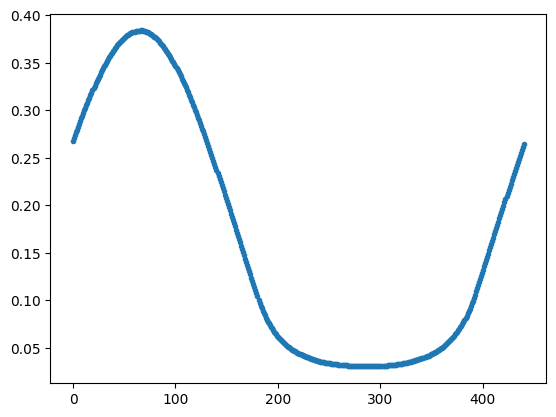

In [33]:
from matplotlib import pyplot as plt

plt.plot(vf.glottal_area(N), ".-")
plt.show()

In [ ]:
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib import patches
import matplotlib.animation as animation
from IPython.display import clear_output

# plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150
# plt.ioff()

z_, y_ = vf.z(N), vf.y(N)
z, y = np.meshgrid(z_, y_)
xi0 = vf.xi0()
xi = vf.xi(N)

xmax = round(xi.max() * 1.2, 1)

widths = np.maximum(np.min(xi, axis=2), 0)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.07801716 0.07801716 0.07801716 0.07801716 0.07801716 0.07801716
  0.07801716 0.07801716 0.07801716 0.07801716 0.07801716 0.07801716
  0.07801716 0.07801716 0.07801716]
 [0.15603432 0.15603432 0.15603432 0.15603432 0.15603432 0.15603432
  0.15603432 0.15603432 0.15603432 0.15603432 0.15603432 0.15603432
  0.15603432 0.15603432 0.15603432]
 [0.23405148 0.23405148 0.23405148 0.23405148 0.23405148 0.23405148
  0.23405148 0.23405148 0.23405148 0.23405148 0.23405148 0.23405148
  0.23405148 0.23405148 0.23405148]
 [0.31206863 0.31206863 0.31206863 0.31206863 0.31206863 0.31206863
  0.31206863 0.31206863 0.31206863 0.31206863 0.31206863 0.31206863
  0.31206863 0.31206863 0.31206863]
 [0.39008579 0.39008579 0.39008579 0.39008579 0.39008579 0.39008579
  0.39008579 0.39008579 0.39008579 0.39008579 0.39008579 0.39008579
  0.39008579 0.39008

(441, 21, 15)
[]


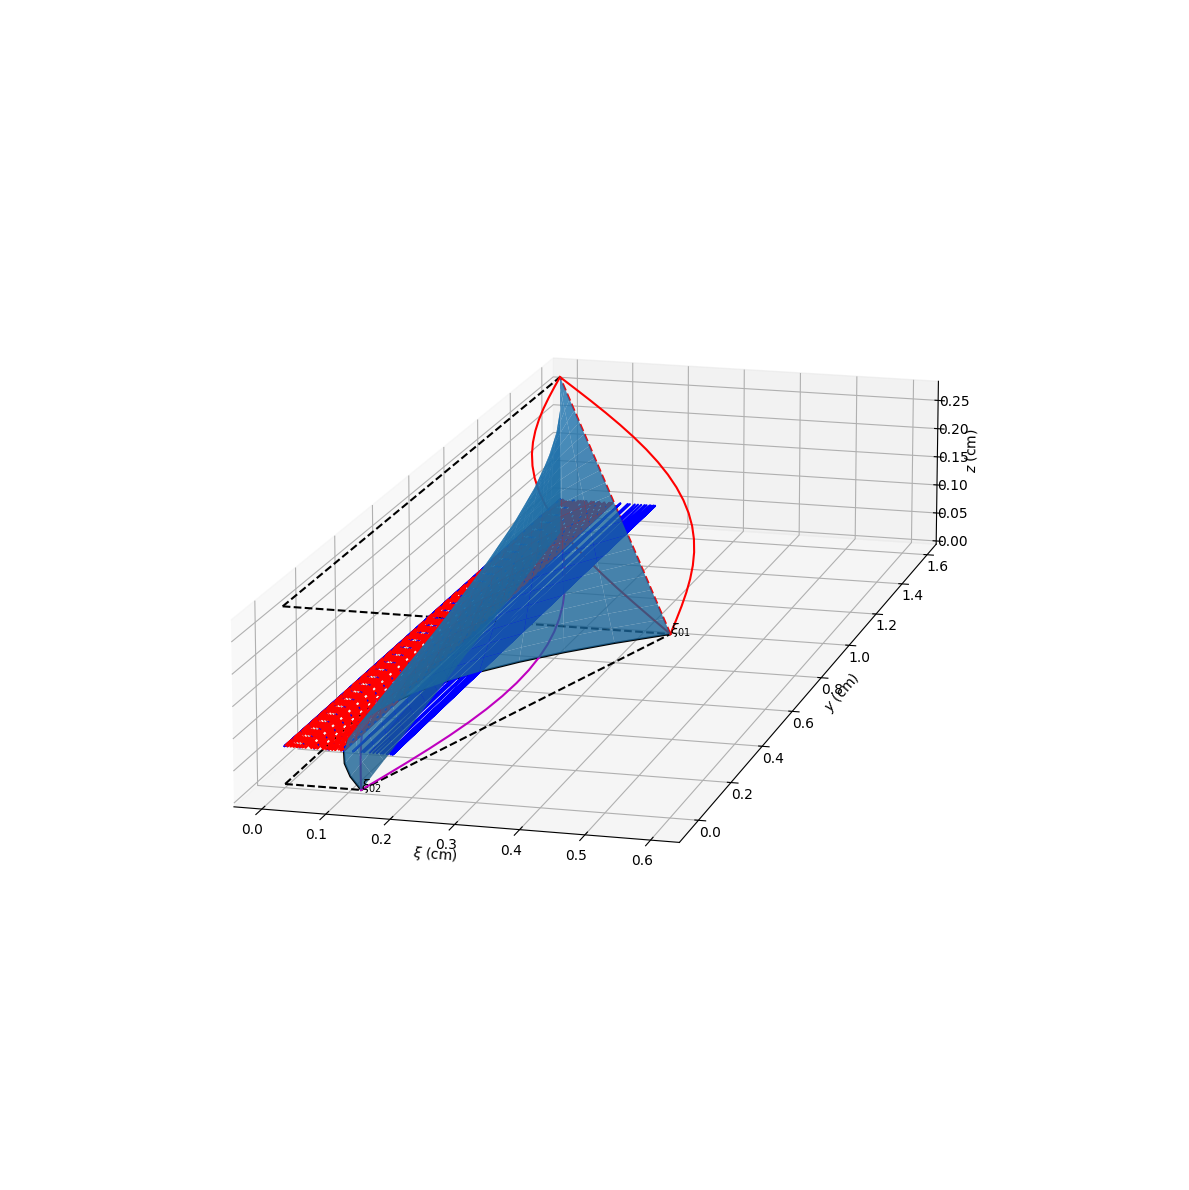

In [35]:
fig, ax = plt.subplots(
    subplot_kw={
        "projection": "3d",
        "elev": 15,
        "azim": -75,
        "roll": 0,
    },
    figsize=[12, 12],
)

print(xi.shape)
xi_max = xi[:, :, -1].max(axis=0)
xi_min = xi[:, :, -1].min(axis=0)

xi_lo_max = xi[:, :, 0].max(axis=0)
xi_lo_min = xi[:, :, 0].min(axis=0)

xi_b_max = xi[:, :, zb].max(axis=0)
xi_b_min = xi[:, :, zb].min(axis=0)


hright = ax.plot_surface(xi0, y, z, color="C0", zorder=0, alpha=0.8)

ax.plot([0, 0], y_[[0, -1]], z_[[0, 0]], "k--")
ax.plot([0, 0], y_[[0, -1]], z_[[-1, -1]], "k--")
ax.plot([0, xi0[0, 0]], y_[[0, 0]], z_[[0, 0]], "k--")
ax.plot([0, xi0[0, -1]], y_[[0, 0]], z_[[-1, -1]], "k--")
ax.plot([xi0[0, 0], xi0[0, -1]], y_[[0, 0]], z_[[0, -1]], "k--")
ax.plot(xi0[0, :], y_[0] * len(z_), z_, "k")
ax.plot(xi0[:, -1], y_, [z_[-1]] * len(y_), "--r")
ax.plot(xi_max, y_, [z_[-1]] * len(y_), "r")
ax.plot(xi_min, y_, [z_[-1]] * len(y_), "r")
ax.plot(xi_lo_max, y_, [z_[0]] * len(y_), "m")
ax.plot(xi_lo_min, y_, [z_[0]] * len(y_), "m")
ax.plot(xi_b_max, y_, [z_[zb]] * len(y_), "b")
ax.plot(xi_b_min, y_, [z_[zb]] * len(y_), "b")
ax.plot(xi0[:, zb], y_, [z_[zb]] * len(y_), "--r")


print(hright._paths)
ax.set_xlabel("$\\xi$ (cm)")
ax.set_ylabel("$y$ (cm)")
ax.set_zlabel("$z$ (cm)")
ax.text(xi0[0, 0], y_[0], z_[0], "$\\xi_{02}$")
ax.text(xi0[0, -1], y_[0], z_[-1], "$\\xi_{01}$")
ax.set_aspect("equal")
fig.tight_layout()

## Prephonatory Vocal Fold Position

The vocal fold position at rest is configured relative to the vibration amplitude by three parameters:

| Variable | Symbol  | Name                             | Default |
| -------- | ------- | -------------------------------- | ------- |
| `xim`    | $\xi_m$ | Maximum vibration amplitude (cm) | 0.1     |
| `Qa`     | $Q_a$   | Abduction quotient               | 0.3     |
| `Qs`     | $Q_s$   | Shape quotient                   | 2.0     |
| `Qb`     | $Q_b$   | Bulging quotient (optional)      | 1.0     |

First, $Q_a$ is the ratio of the lateral position of the vocal fold at the posterior-superior point $\xi_{02}$, and $\xi_m$. Accordingly, $\xi_{02}$ is found by

$$
\begin{array}{ccc}
Q_a = \frac{\xi_{02}}{\xi_m} & \rightarrow & \xi_{02} = Q_a \xi_m
\end{array}
$$

Second, $Q_s$ is the difference between $\xi_{02}$ and the position of the posterior-inferior point $\xi_{01}$ with respect to $\xi_m$, thereby specifying $\xi_{01}$:

$$
\begin{array}{ccc}
Q_s = \frac{\xi_{01} - \xi_{02}}{\xi_m} & \rightarrow & \xi_{01} = \xi_{02} + Q_s \xi_m = (Q_a + Q_s) \xi_m
\end{array}
$$

If the bulging quotient $Q_b$ is not given (i.e., `Qb is None`), then the posterior edge of the vocal fold is defined by a line connecting $\xi_{01}$ and $\xi_{02}$:

$$
\xi_0(z; y=0) = \frac{\xi_{02}-\xi_{01}}{T} z + \xi_{01}
$$

If $Q_b$ is given, the posterior edge is specified by a quadratic function:

$$
\xi_0(z; y=0) = a z^2 + b z + c,
$$

of which coefficients ($a$, $b$, and $c$) are computed from three points: $\xi_{01}$, $\xi_{02}$, and $\xi_{0b}$. The third point $\xi_{0b}$ specifies the prephonatory vocal fold position at the center of the vocal fold (i.e, $z=T/2$ where $T$ is the vocal fold thickness). This point is implicitly defined by $Q_b$:

$$
\begin{array}{ccc}
Q_b = \frac{(\xi_{01}-\xi_{02})/2-(\xi_{0b}-\xi_{02})}{\xi_m} & \rightarrow & \xi_{0b} = (\xi_{01} + \xi_{02})/2 - Q_b \xi_m
\end{array}
$$

Then, the coefficients are given by

$$
\begin{bmatrix} a \\ b \\ c \end{bmatrix} = \begin{bmatrix} T^2 & T & 1 \\ T^2/4 & T/2 & 1 \\ 0 & 0 & 1 \end{bmatrix}^{-1} \begin{bmatrix}\xi_{02} \\ \xi_{0b} \\ \xi_{01} \end{bmatrix}
$$